In [1]:
# 使用最小二乘法拟合曲线
import numpy as np
import scipy as sp

In [2]:
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def real_func(x):
    return np.sin(2*np.pi*x)

def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [4]:
x = np.linspace(0, 1, 10)
x_point = np.linspace(0, 1, 1000)
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]

def fitting(M=0):
    p_init = np.random.rand(M+1)
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    plt.plot(x_point, real_func(x_point), label='real')
    plt.plot(x_point, fit_func(p_lsq[0], x_point), label='foted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [0.00707399]


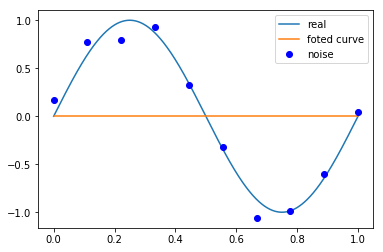

In [5]:
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.4256396   0.71989376]


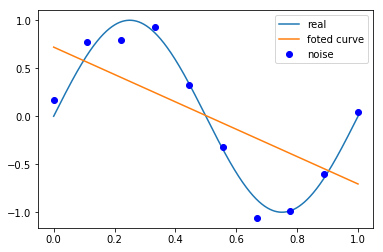

In [6]:
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 20.66171005 -30.315151     9.65626525   0.10601945]


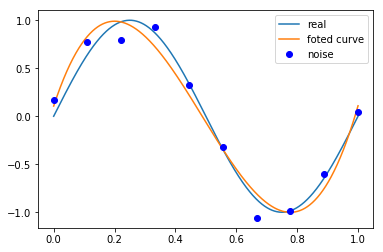

In [7]:
p_lsq_2 = fitting(M=3)

Fitting Parameters: [ 3.56462424e+04 -1.60878302e+05  3.05895905e+05 -3.18699108e+05
  1.97892242e+05 -7.43909476e+04  1.63396666e+04 -1.89707665e+03
  9.12624299e+01  1.64851247e-01]


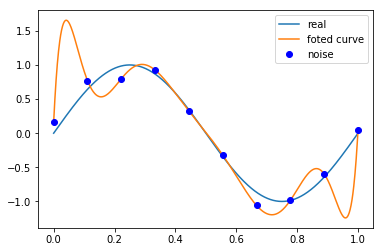

In [8]:
p_lsq_9 = fitting(M=9)

In [9]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p))) # L2范数作为正则化项
    return ret


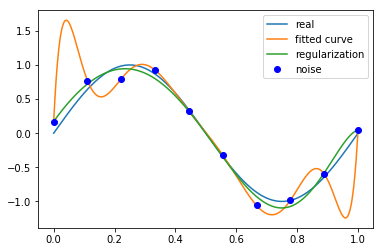

In [10]:
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))
plt.plot(x_point, real_func(x_point), label='real')
plt.plot(x_point, fit_func(p_lsq_9[0], x_point), label='fitted curve')
plt.plot(x_point, fit_func(p_lsq_regularization[0], x_point), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()